In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Load the datasets
train = pd.read_csv('train.csv')
weather = pd.read_csv('weather.csv')
test = pd.read_csv('test.csv')
key = pd.read_csv('key.csv')

In [23]:
# Display basic info and first few rows of each
print(f"Train shape: {train.shape}")
display(train.head())

print(f"Weather shape: {weather.shape}")
display(weather.head())

print(f"Test shape: {test.shape}")
display(test.head())

print(f"Key shape: {key.shape}")
display(key.head())

Train shape: (4617600, 4)


,date,store_nbr,item_nbr,units
0,2012-01-01,1,1,0
1,2012-01-01,1,2,0
2,2012-01-01,1,3,0
3,2012-01-01,1,4,0
4,2012-01-01,1,5,0


Weather shape: (20517, 20)


,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,1,2012-01-01,52,31,42,M,36,40,23,0,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2,2012-01-01,48,33,41,16,37,39,24,0,0716,1626,RA,0.0,0.07,28.82,29.91,9.1,23,11.3
2,3,2012-01-01,55,34,45,9,24,36,20,0,0735,1720,,0.0,0.00,29.77,30.47,9.9,31,10.0
3,4,2012-01-01,63,47,55,4,28,43,10,0,0728,1742,,0.0,0.00,29.79,30.48,8.0,35,8.2
4,6,2012-01-01,63,34,49,0,31,43,16,0,0727,1742,,0.0,0.00,29.95,30.47,14.0,36,13.8


Test shape: (526917, 3)


,date,store_nbr,item_nbr
0,2013-04-01,2,1
1,2013-04-01,2,2
2,2013-04-01,2,3
3,2013-04-01,2,4
4,2013-04-01,2,5


Key shape: (45, 2)


,store_nbr,station_nbr
0,1,1
1,2,14
2,3,7
3,4,9
4,5,12


In [24]:
# Convert date column to datetime
for df in (train, test, weather):
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

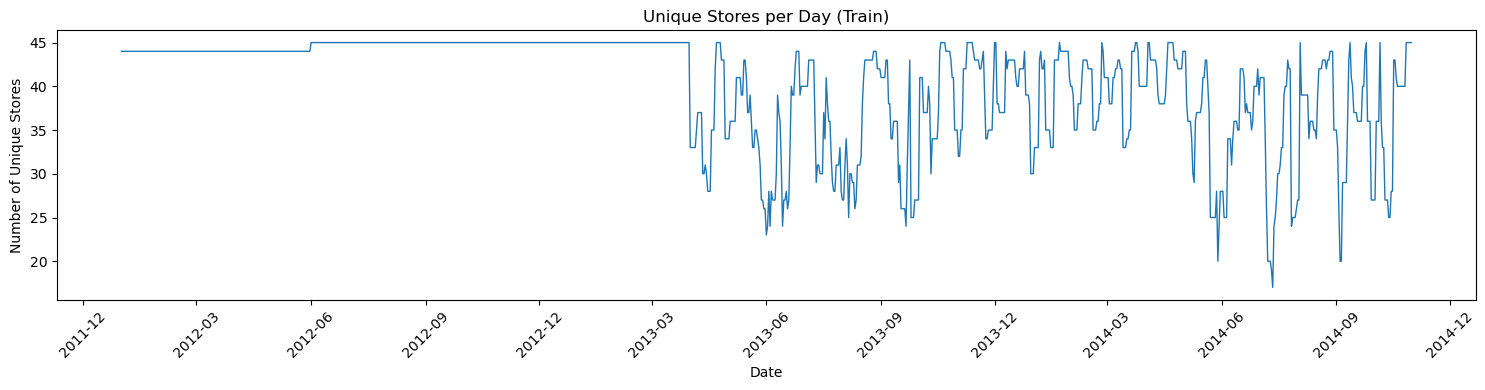

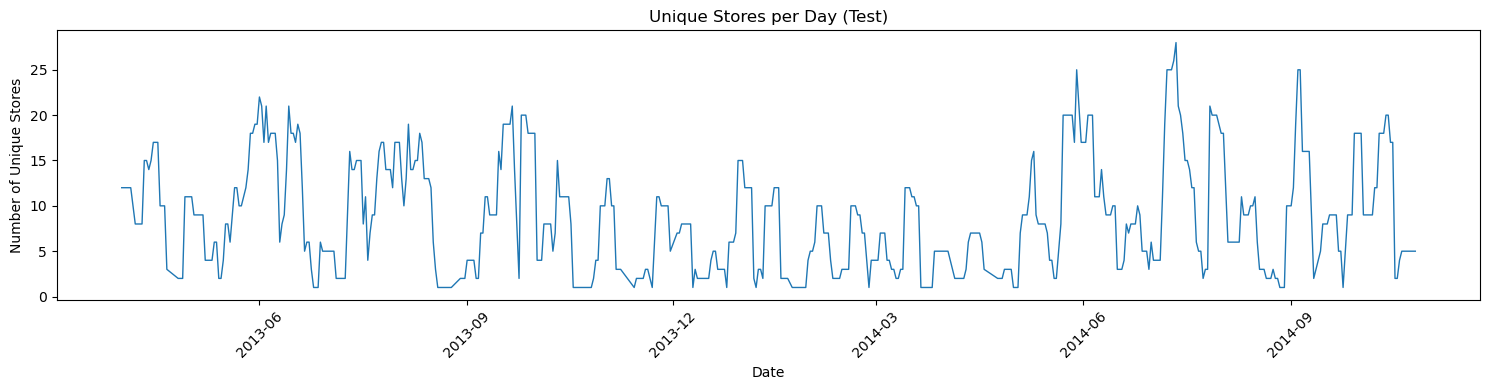

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# 2) Helper to build the daily unique-store DataFrame
def get_daily_unique(df):
    daily = df.groupby('date')['store_nbr'].nunique().reset_index()
    daily.rename(columns={'store_nbr':'unique_stores'}, inplace=True)
    return daily

train_daily = get_daily_unique(train)
test_daily  = get_daily_unique(test)

# 3) Plot function with quarterly ticks
def plot_unique(daily, title):
    plt.figure(figsize=(15,4))
    plt.plot(daily['date'], daily['unique_stores'], linewidth=1)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Number of Unique Stores')

    # set one tick every 3 months
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4) Draw both charts
plot_unique(train_daily, "Unique Stores per Day (Train)")
plot_unique(test_daily,  "Unique Stores per Day (Test)")


In [28]:
train.describe()

,date,store_nbr,item_nbr,units
count,4617600,4.617600e+06,4.617600e+06,4.617600e+06
mean,2013-05-08 06:23:03.230769920,2.309108e+01,5.600000e+01,9.868756e-01
min,2012-01-01 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2012-08-22 00:00:00,1.200000e+01,2.800000e+01,0.000000e+00
50%,2013-04-15 00:00:00,2.300000e+01,5.600000e+01,0.000000e+00
75%,2014-01-24 00:00:00,3.400000e+01,8.400000e+01,0.000000e+00
max,2014-10-31 00:00:00,4.500000e+01,1.110000e+02,5.568000e+03
std,NaN,1.295281e+01,3.204164e+01,9.875798e+00


In [33]:
weather.dtypes

station_nbr     int64
date           object
tmax           object
tmin           object
tavg           object
depart         object
dewpoint       object
wetbulb        object
heat           object
cool           object
sunrise        object
sunset         object
codesum        object
snowfall       object
preciptotal    object
stnpressure    object
sealevel       object
resultspeed    object
resultdir      object
avgspeed       object
dtype: object

In [32]:
weather.describe()

,station_nbr
count,20517.000000
mean,10.549057
std,5.768533
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,20.000000


In [26]:
# Merge train -> key -> weather
train_full = (
    train
    .merge(key,     on='store_nbr',                 how='left')            # add station_nbr
    .merge(weather, on=['station_nbr','date'],     how='left')            # add weather cols
)

# Same for test
test_full = (
    test
    .merge(key,     on='store_nbr',                 how='left')
    .merge(weather, on=['station_nbr','date'],     how='left')
)

In [27]:
train_full

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2012-01-01,1,1,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
1,2012-01-01,1,2,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
2,2012-01-01,1,3,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
3,2012-01-01,1,4,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
4,2012-01-01,1,5,0,1,52,31,42,M,36,...,-,-,RA FZFG BR,M,0.05,29.78,29.92,3.6,20,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617595,2014-10-31,45,107,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
4617596,2014-10-31,45,108,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
4617597,2014-10-31,45,109,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
4617598,2014-10-31,45,110,0,16,53,34,44,M,35,...,-,-,,M,0.00,29.90,29.99,4.5,03,5.3


In [ ]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [22]:
df = pd.read_csv('data/data_clean.csv')

In [23]:
df

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,snowfall,...,avg_daily_sales_item,store_sales_rank,item_sales_rank,daylight_duration,season_encoded_sin,season_encoded_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,2012-01-01,1,9,29,1,52.0,31.0,42.0,0.0,0.0,...,29.489774,39.0,2.0,1013.0,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
1,2012-01-01,40,93,0,13,38.0,18.0,28.0,0.0,0.0,...,0.728981,16.0,16.0,1013.0,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
2,2012-01-01,40,55,0,13,38.0,18.0,28.0,0.0,0.0,...,0.929773,16.0,48.0,1013.0,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
3,2012-01-01,40,51,1,13,38.0,18.0,28.0,0.0,0.0,...,0.309594,16.0,35.0,1013.0,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
4,2012-01-01,40,45,48,13,38.0,18.0,28.0,0.0,0.0,...,61.662710,16.0,1.0,1013.0,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236033,2014-10-31,13,93,0,6,76.0,51.0,64.0,0.0,0.0,...,1.098272,9.0,16.0,1101.0,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000
236034,2014-10-31,13,104,0,6,76.0,51.0,64.0,0.0,0.0,...,0.099352,9.0,67.0,1101.0,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000
236035,2014-10-31,3,2,0,7,58.0,38.0,48.0,0.0,0.0,...,1.208705,13.0,28.0,1062.5,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000
236036,2014-10-31,35,66,10,5,64.0,51.0,58.0,0.0,0.0,...,15.673325,38.0,18.0,1024.0,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000


In [25]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [26]:
print(numeric_cols)

['store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin', 'tavg', 'depart', 'snowfall', 'preciptotal', 'stnpressure', 'resultdir', 'avgspeed', 'BR', 'DZ', 'FG', 'FG+', 'FZFG', 'HZ', 'RA', 'SN', 'TS', 'TSRA', 'VCTS', 'weekend', 'day_of_year', 'temperature_diff', 'heavy_precipitation', 'comfort_index', 'avg_temp_last_3_days', 'avg_precip_last_3_days', 'days_since_start', 'is_holiday', 'avg_daily_sales_item', 'store_sales_rank', 'item_sales_rank', 'daylight_duration', 'season_encoded_sin', 'season_encoded_cos', 'day_of_week_sin', 'day_of_week_cos', 'month_sin', 'month_cos']


In [27]:
categorical_cols

['date']

In [28]:
# Unique counts for categoricals
unique_counts = [(col, df[col].nunique()) for col in categorical_cols]
unique_df = pd.DataFrame(unique_counts, columns=['column', 'unique_count'])

In [19]:
unique_df

,column,unique_count
0,date,1034


In [29]:
df = pd.read_csv('data/data_for_modeling.csv')

In [30]:
df

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,snowfall,...,item_sales_rank,daylight_duration,day_of_year_sin,day_of_year_cos,season_encoded_sin,season_encoded_cos,day_of_week_sin,day_of_week_cos,month_sin,month_cos
0,2012-01-01,1,9,29,1,0.008,-0.045872,0.000000,-0.015385,-1.0,...,-0.981481,-0.634615,0.017202,0.999852,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
1,2012-01-01,40,93,0,13,-0.216,-0.284404,-0.241379,-0.015385,-1.0,...,-0.722222,-0.634615,0.017202,0.999852,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
2,2012-01-01,40,55,0,13,-0.216,-0.284404,-0.241379,-0.015385,-1.0,...,-0.129630,-0.634615,0.017202,0.999852,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
3,2012-01-01,40,51,1,13,-0.216,-0.284404,-0.241379,-0.015385,-1.0,...,-0.370370,-0.634615,0.017202,0.999852,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
4,2012-01-01,40,45,48,13,-0.216,-0.284404,-0.241379,-0.015385,-1.0,...,-1.000000,-0.634615,0.017202,0.999852,1.000000e+00,6.123234e-17,-0.781831,0.623490,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236033,2014-10-31,13,93,0,6,0.392,0.321101,0.379310,-0.015385,-1.0,...,-0.722222,-0.352564,-0.869233,0.494403,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000
236034,2014-10-31,13,104,0,6,0.392,0.321101,0.379310,-0.015385,-1.0,...,0.222222,-0.352564,-0.869233,0.494403,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000
236035,2014-10-31,3,2,0,7,0.104,0.082569,0.103448,-0.015385,-1.0,...,-0.500000,-0.475962,-0.869233,0.494403,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000
236036,2014-10-31,35,66,10,5,0.200,0.321101,0.275862,-0.015385,-1.0,...,-0.685185,-0.599359,-0.869233,0.494403,-2.449294e-16,1.000000e+00,-0.433884,-0.900969,-0.866025,0.500000


In [35]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# 2. Exclude the ID/target columns
exclude = {'store_nbr', 'item_nbr', 'units', 'station_nbr'}
check_cols = [c for c in num_cols if c not in exclude]

# 3. Check ranges
out_of_range = {}
for col in check_cols:
    mn, mx = df[col].min(), df[col].max()
    if mn < -1 or mx > 1:
        out_of_range[col] = (mn, mx)

# 4. Print results
if not out_of_range:
    print("✅ All numeric columns (excluding store_nbr, item_nbr, units, station_nbr) are within [-1, 1].")
else:
    print("⚠️ These columns are out of range:")
    for col, (mn, mx) in out_of_range.items():
        print(f"  • {col}: min={mn:.3f}, max={mx:.3f}")

⚠️ These columns are out of range:
  • avg_daily_sales_item: min=-1.000, max=1.000
